In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.stats as stm
from statsmodels.graphics.gofplots import qqplot

In [2]:
df = pd.read_csv('../../../examples/EFIplus_medit.zip',compression='zip', sep=";")

In [3]:
df.drop(df.iloc[:,5:15], axis=1, inplace=True)
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True)
df.columns = list(map(str, df.columns))

df.head()

,Site_code,Latitude,Longitude,Country,Catchment_name,Water_source_type,Flow_regime,Altitude,Geological_typology,Actual_river_slope,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,Pluvial,Permanent,199,Siliceous,0.001,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,Groundwater,Permanent,1253,Calcareous,13.406,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,Groundwater,Permanent,1155,Calcareous,9.398,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,Groundwater,Permanent,1074,Calcareous,8.186,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,Groundwater,Permanent,1018,Calcareous,11.736,...,0,0,0,0,0,0,0,0,0,0


## 1. According to the kstest, none of the environmental variables are statistically Normal, and the histogram and qq-plot graphs show that while some might look similar to Normal distributions, it might be better to transform them to get better results

Altitude - Normality Test
Statistics=0.996, p=0.000
Reject H0, Altitude population is not Normal



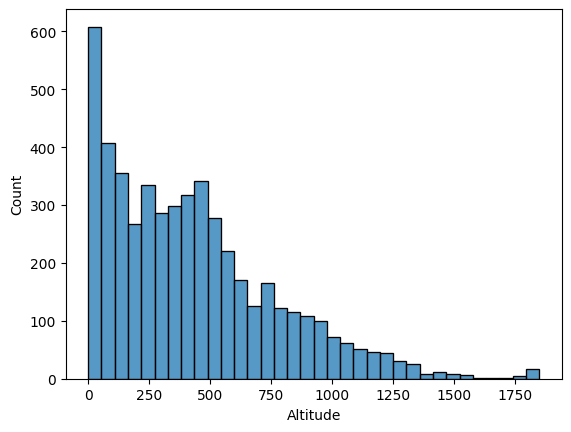

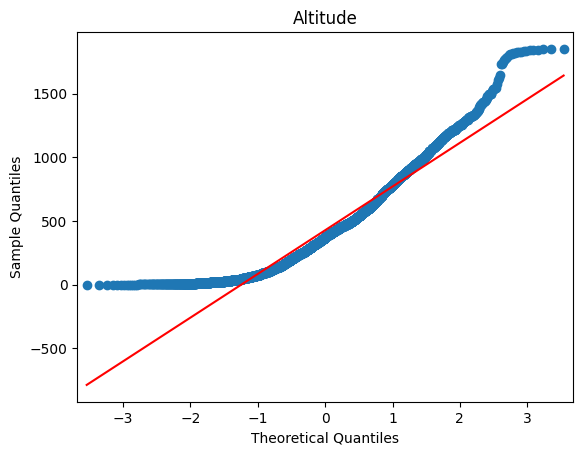

Actual_river_slope - Normality Test
Statistics=0.836, p=0.000
Reject H0, Actual_river_slope population is not Normal



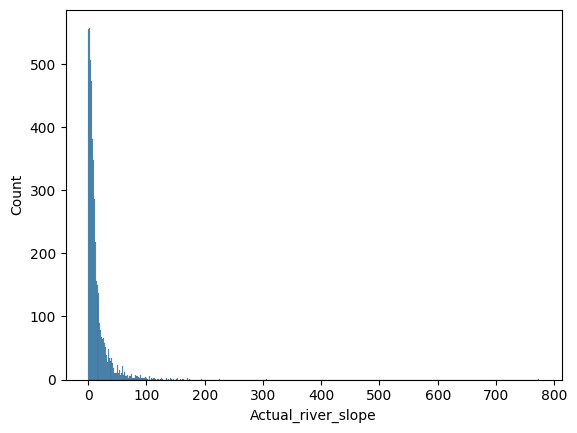

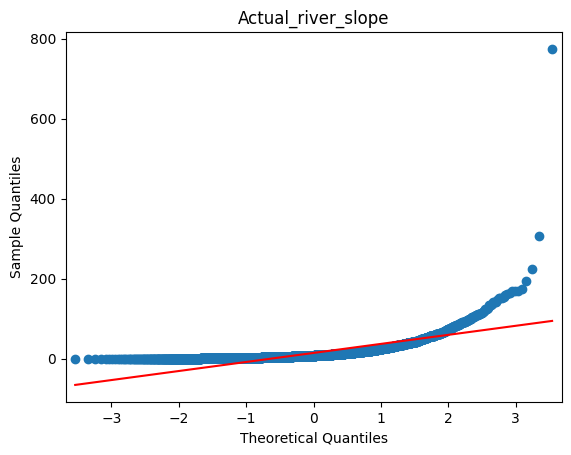

Elevation_mean_catch - Normality Test
Statistics=1.000, p=0.000
Reject H0, Elevation_mean_catch population is not Normal



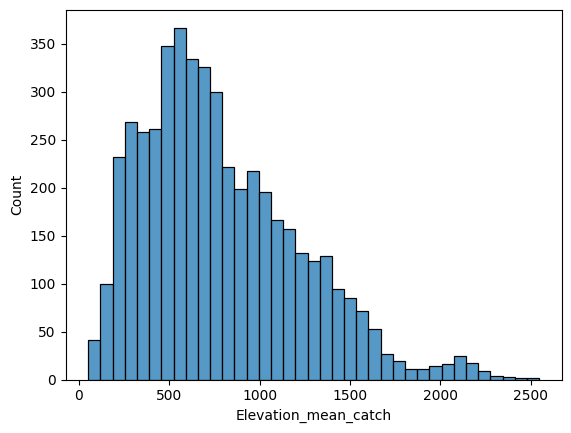

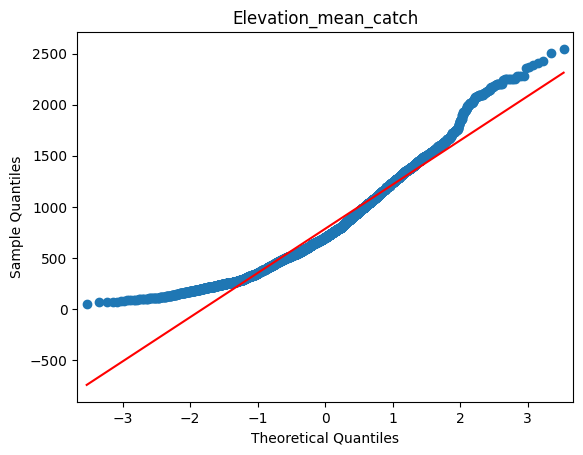

prec_ann_catch - Normality Test
Statistics=1.000, p=0.000
Reject H0, prec_ann_catch population is not Normal



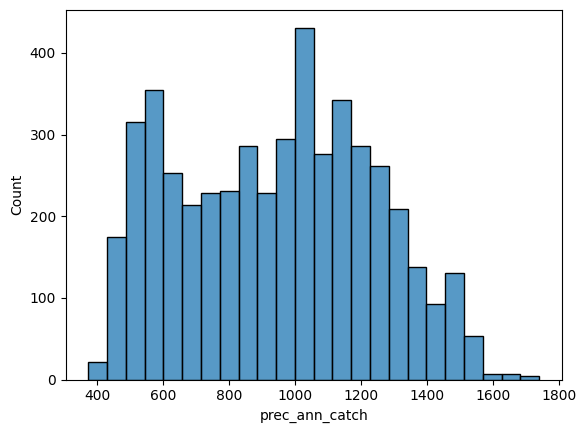

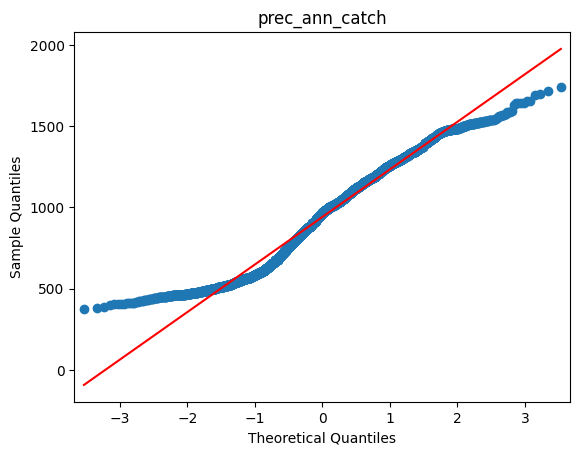

temp_ann - Normality Test
Statistics=1.000, p=0.000
Reject H0, temp_ann population is not Normal



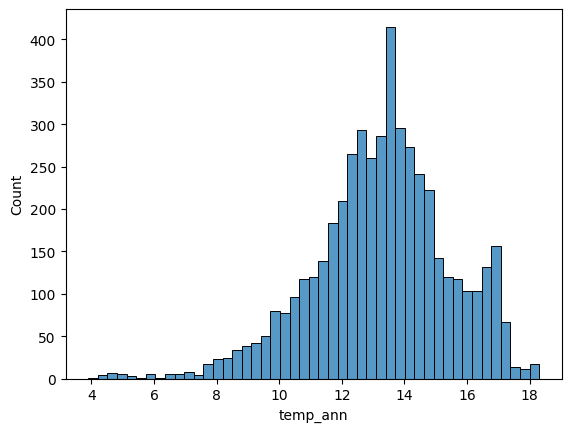

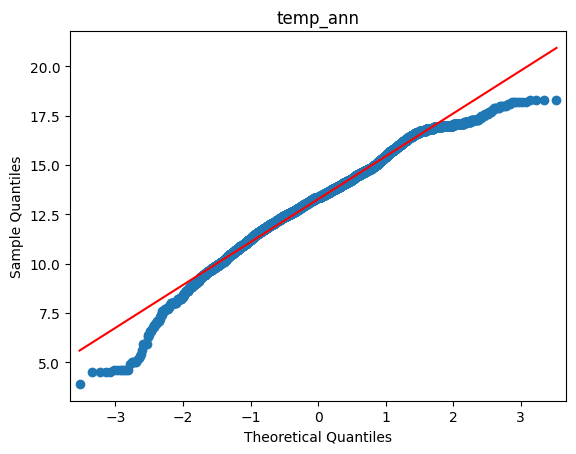

temp_jan - Normality Test
Statistics=0.919, p=0.000
Reject H0, temp_jan population is not Normal



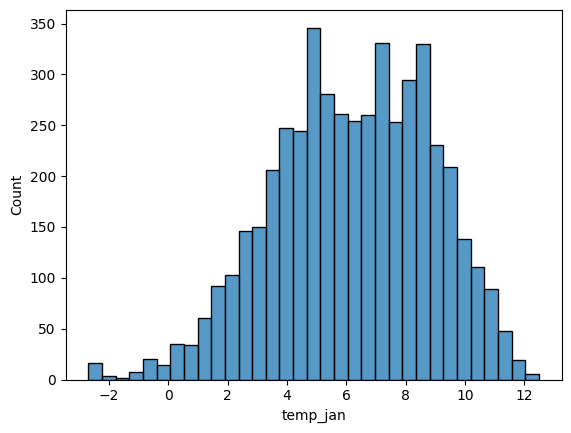

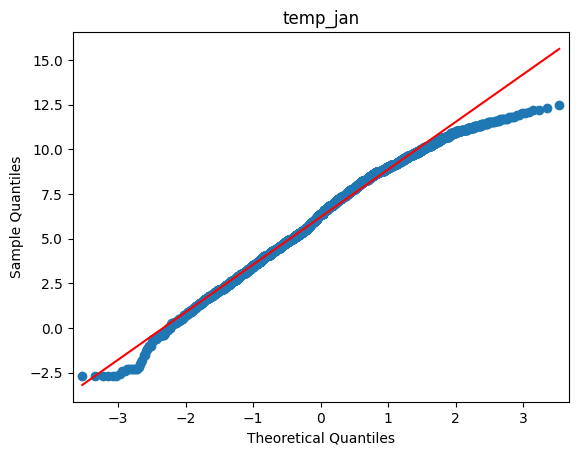

temp_jul - Normality Test
Statistics=1.000, p=0.000
Reject H0, temp_jul population is not Normal



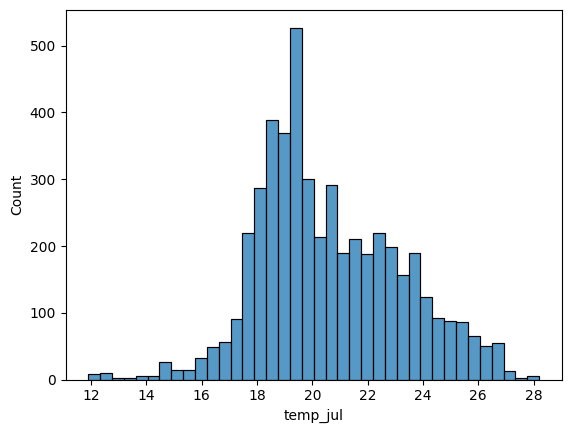

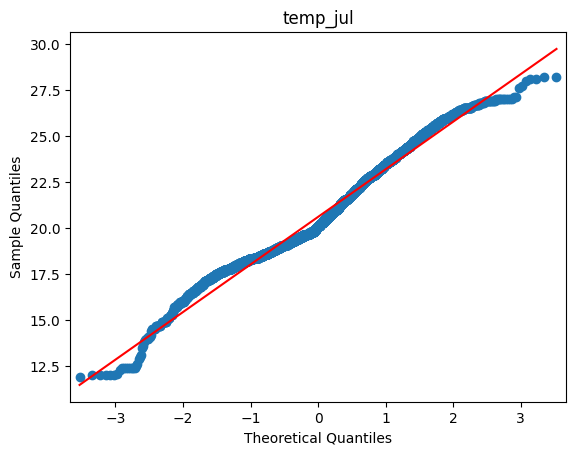

In [16]:
envi_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

for var in envi_vars:
    # normality test
    data = df[var].dropna()
    stat, p = sts.kstest(data, 'norm')
    print(f'{var} - Normality Test')
    print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs with 3 decimal places
    # interpret. H0: 'the sample was drawn from a Gaussian distribution'.
    alpha = 0.05
    if p > alpha:
        print(f'Fail to reject H0, {var} distribution is not significantly different from Normal')
    else:
        print(f'Reject H0, {var} population is not Normal')
    print()
    sns.histplot(data)
    qqplot(data, line='s')
    
    plt.title(var)
    plt.show()

## 2. Normalizing data with Yeo-Johnson Transformation

In [22]:
df[envi_vars].describe()

,Altitude,Actual_river_slope,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul
count,5011.000000,4975.000000,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000
mean,428.072042,14.582432,785.177935,941.823810,13.261950,6.211403,20.604503
std,342.912849,22.596125,432.725266,292.497317,2.172315,2.662325,2.583101
min,0.000000,0.000000,52.249944,373.366940,3.900000,-2.700000,11.900000
25%,142.000000,3.509500,468.393265,677.473828,12.000000,4.300000,18.800000
50%,375.000000,8.000000,701.438554,968.898321,13.400000,6.400000,20.100000
75%,610.500000,17.170000,1049.983330,1168.356822,14.600000,8.300000,22.500000
max,1851.000000,774.000000,2545.546876,1739.000486,18.300000,12.500000,28.200000


In [29]:
envi_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
df_vars_trans = df.copy()
for var in envi_vars:
    trans_data, lambda_value = sts.yeojohnson(df[var].dropna())
    df_vars_trans[var] = pd.Series(trans_data)
    print(f"Lambda value: {lambda_value}")

df_vars_trans[envi_vars]

Lambda value: 0.40447400780212617
Lambda value: -0.030714347822139075
Lambda value: 0.33751348284460553
Lambda value: 0.6992582621249176
Lambda value: 1.8623871584697858
Lambda value: 1.1645150099125265
Lambda value: 0.23703772990198296


,Altitude,Actual_river_slope,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul
0,18.605013,0.000999,24.098712,112.421340,123.701108,10.956137,5.160778
1,41.816075,2.561283,32.810210,129.861323,40.789217,0.625690,4.352819
2,40.382132,2.259391,32.622317,128.844842,46.966611,1.292129,4.423349
3,39.141256,2.143838,32.427703,127.780539,46.966611,1.292129,4.413386
4,38.250455,2.447548,32.323387,127.242358,48.573040,1.871411,4.462835
...,...,...,...,...,...,...,...
5006,12.150838,NaN,NaN,NaN,NaN,NaN,NaN
5007,16.340258,NaN,NaN,NaN,NaN,NaN,NaN
5008,15.826034,NaN,NaN,NaN,NaN,NaN,NaN
5009,26.813299,NaN,NaN,NaN,NaN,NaN,NaN


Altitude - Normality Test
Statistics=222.349, p=0.000
Reject H0, Altitude population is not Normal



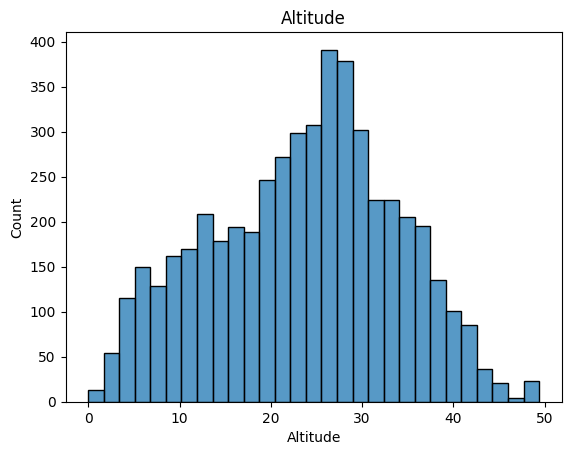

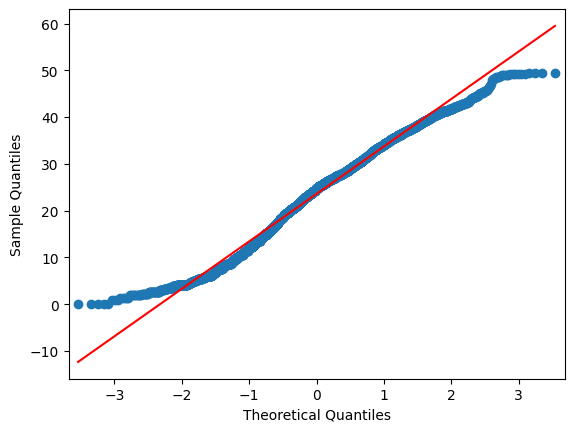

Actual_river_slope - Normality Test
Statistics=10.412, p=0.005
Reject H0, Actual_river_slope population is not Normal



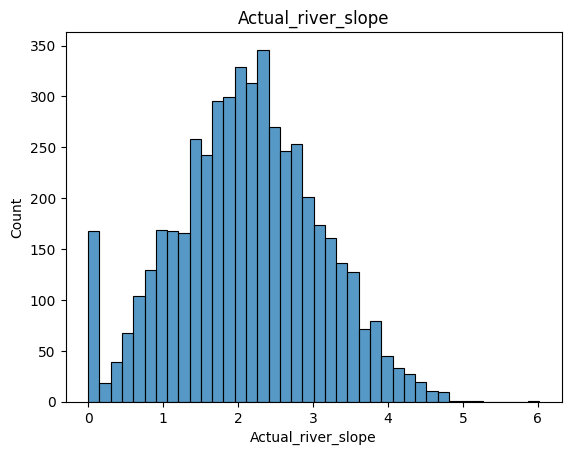

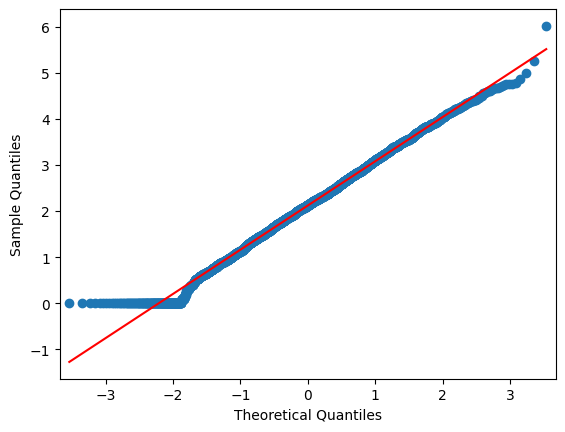

Elevation_mean_catch - Normality Test
Statistics=58.871, p=0.000
Reject H0, Elevation_mean_catch population is not Normal



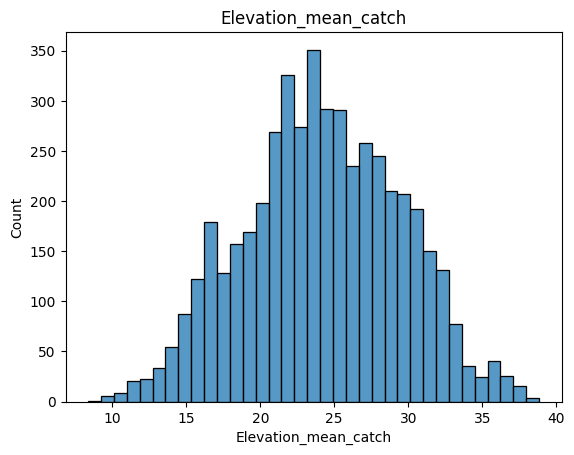

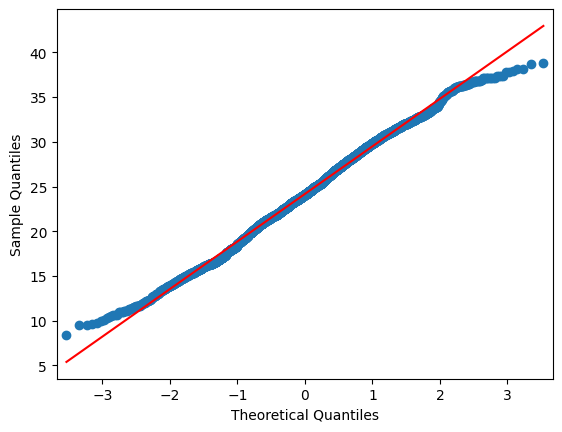

prec_ann_catch - Normality Test
Statistics=1236.452, p=0.000
Reject H0, prec_ann_catch population is not Normal



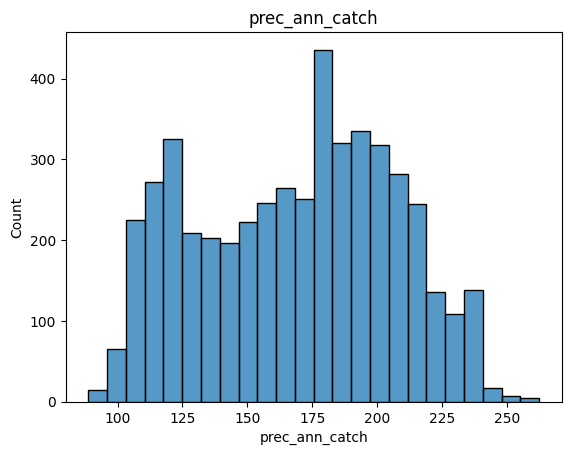

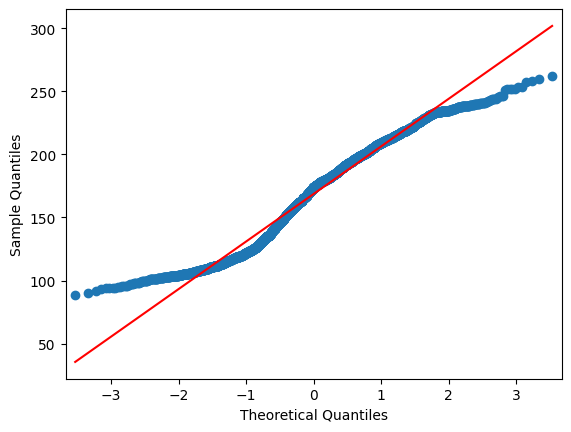

temp_ann - Normality Test
Statistics=0.909, p=0.635
Fail to reject H0, temp_ann distribution is not significantly different from Normal



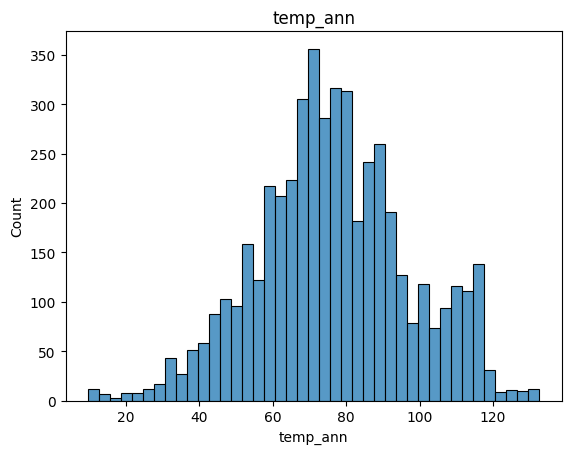

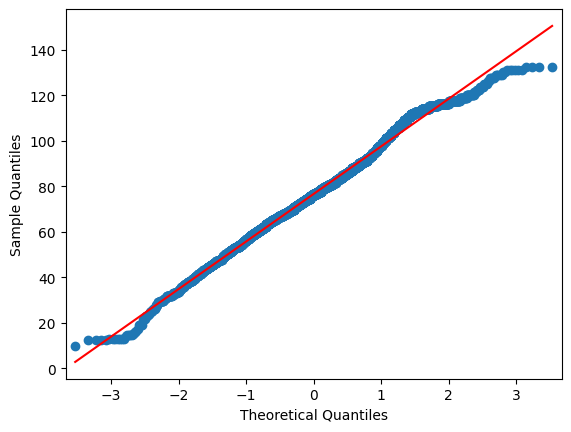

temp_jan - Normality Test
Statistics=157.327, p=0.000
Reject H0, temp_jan population is not Normal



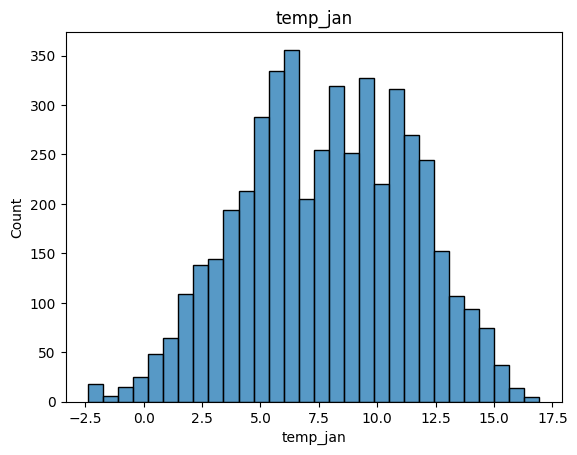

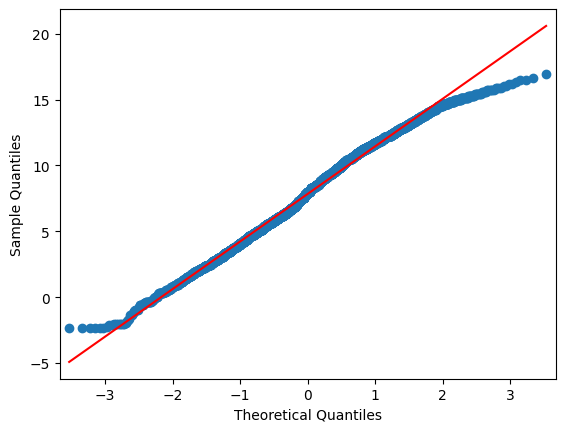

temp_jul - Normality Test
Statistics=11.161, p=0.004
Reject H0, temp_jul population is not Normal



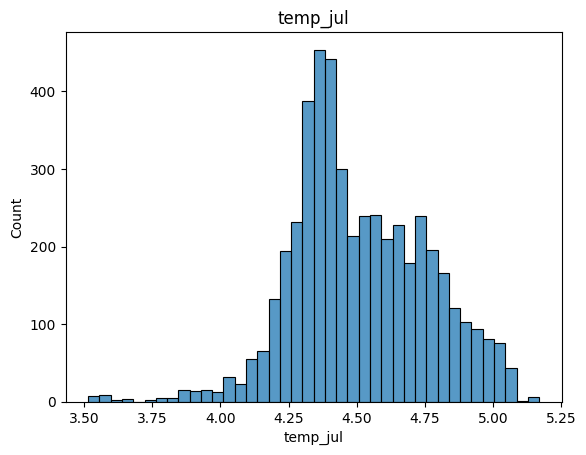

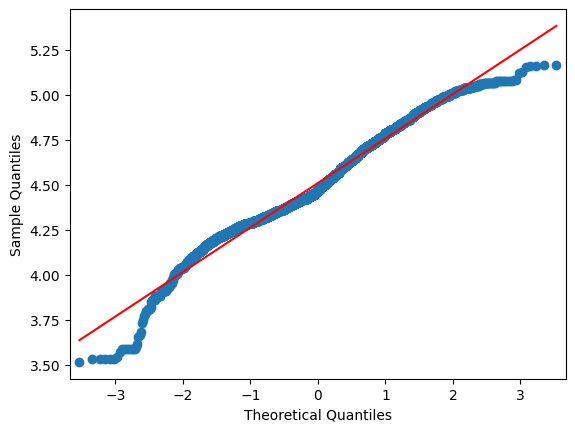

In [33]:
for var in envi_vars:
    # normality test
    data = df_vars_trans[var].dropna()
    original_data = df[var].dropna()
    stat, p = sts.normaltest(data)
    print(f'{var} - Normality Test')
    print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs with 3 decimal places
    # interpret. H0: 'the sample was drawn from a Gaussian distribution'.
    alpha = 0.05
    if p > alpha:
        print(f'Fail to reject H0, {var} distribution is not significantly different from Normal')
    else:
        print(f'Reject H0, {var} population is not Normal')
    print()
    sns.histplot(data)
    plt.title(var)
    qqplot(data, line='s')
    
    plt.show()

## 3. Species richness per site

In [37]:
df['Richness'] = df.loc[:, 'Abramis brama':].sum(axis=1)

,Site_code,Latitude,Longitude,Country,Catchment_name,Water_source_type,Flow_regime,Altitude,Geological_typology,Actual_river_slope,...,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp,Richness
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,Pluvial,Permanent,199,Siliceous,0.001,...,0,0,0,0,0,0,0,0,0,1
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,Groundwater,Permanent,1253,Calcareous,13.406,...,0,0,0,0,0,0,0,0,0,1
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,Groundwater,Permanent,1155,Calcareous,9.398,...,0,0,0,0,0,0,0,0,0,1
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,Groundwater,Permanent,1074,Calcareous,8.186,...,0,0,0,0,0,0,0,0,0,2
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,Groundwater,Permanent,1018,Calcareous,11.736,...,0,0,0,0,0,0,0,0,0,2


In [38]:
df['Richness'].describe()

count    5011.000000
mean        3.508481
std         2.879080
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        29.000000
Name: Richness, dtype: float64

## 4. Bivariate outliers between temp_ann and Richness

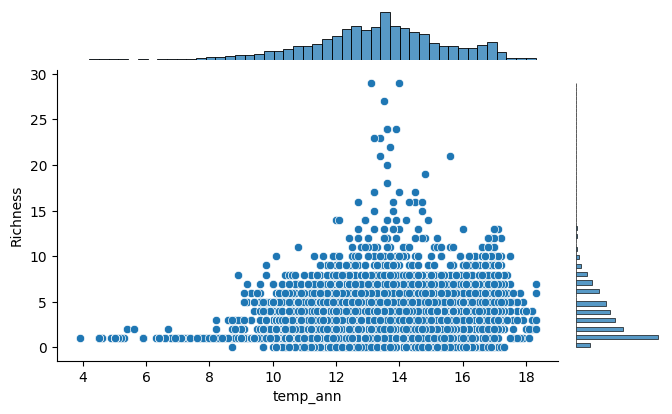

In [41]:
g = sns.JointGrid(data=df, x='temp_ann', y='Richness') 
g.plot(sns.scatterplot, sns.histplot) # to plot both a scatter plot and a boxplot for each variable
g.ax_marg_x.set_axis_off() # removes the marginal x-axis
g.ax_marg_y.set_axis_off() # removes the marginal y-axis
g.fig.set_figwidth(7) # to define the width to get a non-square figure with JointGrid 
g.fig.set_figheight(4) # to define the height to get a non-square figure with JointGrid 
plt.show()

Isolation forest with only contamination

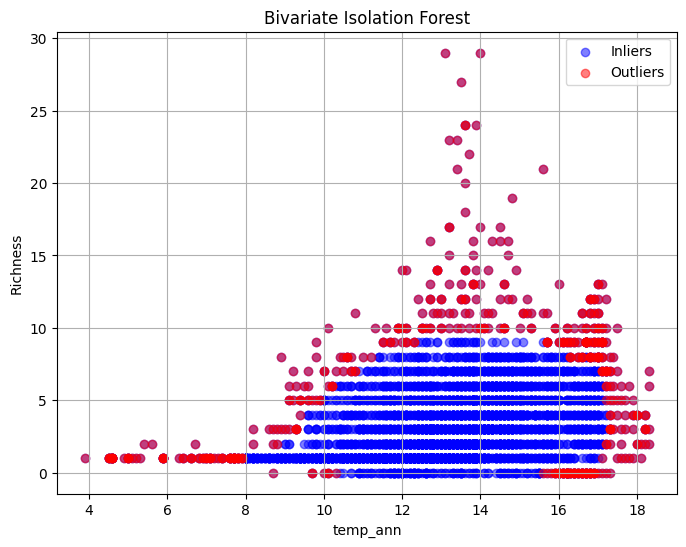

In [47]:
from sklearn.ensemble import IsolationForest

X = df[['temp_ann', 'Richness']].dropna().values

# Fit the Isolation Forest model
clf = IsolationForest(contamination=0.1)
clf.fit(X)

# Predict outliers
outliers = clf.predict(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='blue', alpha=0.5, label='Inliers')
plt.scatter(X[outliers == -1, 0], X[outliers == -1, 1], color='red', alpha=0.5, label='Outliers')
plt.title('Bivariate Isolation Forest')
plt.xlabel('temp_ann')
plt.ylabel('Richness')
plt.legend()
plt.grid(True)
plt.show()

Isolation forest using anomaly identifier

In [70]:
df_rich_temp = df[['temp_ann', 'Richness']].dropna()

model = IsolationForest(n_estimators = 150, contamination='auto', max_features=2)
model.fit(df_rich_temp[['temp_ann', 'Richness']].to_numpy())
scores = model.decision_function(df_rich_temp[['temp_ann', 'Richness']].to_numpy()) #  extract the anomaly scores (mean anomaly scores of each tree)
anomaly = model.predict(df_rich_temp[['temp_ann', 'Richness']].to_numpy()) # extract an anomaly (outlier) identifier (-1)
df_rich_temp['scores'] = scores # add a new column to the database with the anomaly scores
df_rich_temp['anomaly'] = anomaly # add a new column to the database with the anomaly identifier (1/-1)
pd.crosstab(df['anomaly'], columns='count') # count the number of outliers

col_0,count
anomaly,
-1,1086
1,3925


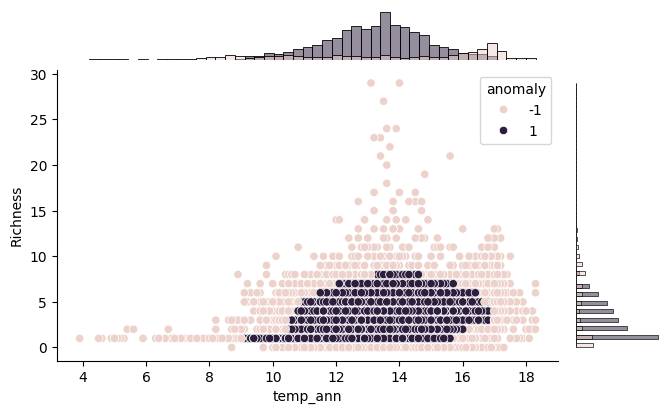

In [71]:
g = sns.JointGrid(data=df_rich_temp, x='temp_ann', y='Richness', hue='anomaly') 
g.plot(sns.scatterplot, sns.histplot) # to plot both a scatter plot and a boxplot for each variable
g.ax_marg_x.set_axis_off() # removes the marginal x-axis
g.ax_marg_y.set_axis_off() # removes the marginal y-axis
g.fig.set_figwidth(7) # to define the width to get a non-square figure with JointGrid 
g.fig.set_figheight(4) # to define the height to get a non-square figure with JointGrid 
plt.show()